# Emails with Python

In [3]:
# How to send emails with python?

In [5]:
# How to check your inbox for recieved messages?

## Sending Emails 

To send emails with Python:
1) Connect to an Email Server
2) Confirm the Connection
3) Set up a Protocol
4) Log on to Email Server
5) Send the Mail

In [9]:
# smtlib library does these steps with simple function calls

For Gmail users, you need to generate an app password instead of normal password 

This let's Gmail know that the Python Script attempting to access your account is authorized by you.

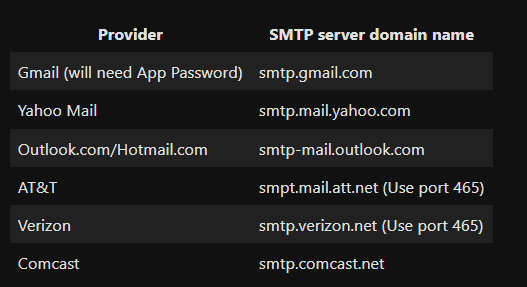

In [14]:
import smtplib

In [16]:
smtp_object = smtplib.SMTP('smtp.gmail.com',port = 587)

In [18]:
smtp_object.ehlo()

(250,
 b'smtp.gmail.com at your service, [2409:4081:e9d:1080:2dcf:f2df:da91:6037]\nSIZE 35882577\n8BITMIME\nSTARTTLS\nENHANCEDSTATUSCODES\nPIPELINING\nCHUNKING\nSMTPUTF8')

In [20]:
# The above message means you have successful connection

In [22]:
smtp_object.starttls()

(220, b'2.0.0 Ready to start TLS')

In [24]:
import getpass

In [30]:
password = getpass.getpass("Please enter your password : ")

Please enter your password :  ········


In [ ]:
print(password)

In [34]:
email = getpass.getpass("Enter your Email ID : ")
password = getpass.getpass("Enter your Password : ")

Enter your Email ID :  ········
Enter your Password :  ········


In [36]:
smtp_object.login(email,password)

(235, b'2.7.0 Accepted')

In [40]:
from_address = email
to_address = email
Subject = input("Enter the Subject to Your Email : ")
message = input("Enter the Body Message : ")
msg = "Subject: " + Subject + '\n' + message 

smtp_object.sendmail(from_address,to_address,msg)

Enter the Subject to Your Email :  Favourite Color
Enter the Body Message :  Hey There! I just wanted to tell you that my Favourite Color is Yellow ! 


{}

In [42]:
smtp_object.quit()

(221,
 b'2.0.0 closing connection 41be03b00d2f7-b2f5f8951besm3445746a12.70 - gsmtp')

## Receiving Emails 

In [46]:
# imaplib library and email library from Python

In [48]:
# impalib library has a special syntax for searching inbox

In [50]:
import imaplib

In [52]:
M = imaplib.IMAP4_SSL('imap.gmail.com')

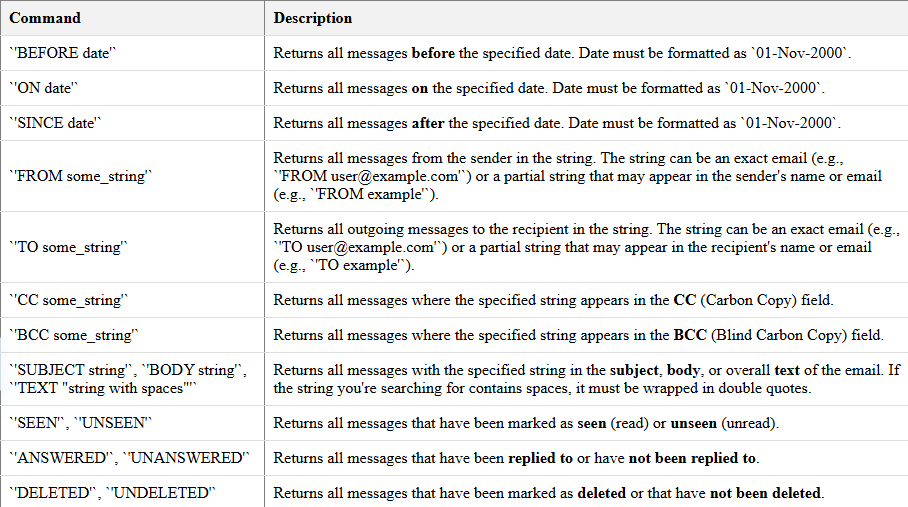

In [53]:
import getpass

In [60]:
email = getpass.getpass('Email : ')
password = getpass.getpass('Password : ')

Email :  ········
Password :  ········


In [62]:
M.login(email,password)

('OK', [b'vallabhkul953@gmail.com authenticated (Success)'])

In [ ]:
M.list()

In [66]:
M.select('inbox')

('OK', [b'4681'])

In [68]:
# typ, data = M.search(None,'BEFORE 01-May-2025')

In [70]:
typ, data = M.search(None, 'SUBJECT "Favourite Color"')

In [72]:
typ

'OK'

In [74]:
data

[b'4681']

In [76]:
data[0]

b'4681'

In [78]:
email_id = data[0]

In [82]:
result, email_data = M.fetch(email_id, '(RFC822)')

In [ ]:
email_data

In [86]:
raw_email = email_data[0][1]

In [88]:
raw_email_string = raw_email.decode('utf-8')

In [90]:
import email

In [92]:
email_message = email.message_from_string(raw_email_string)

In [94]:
for part in email_message.walk():
    if part.get_content_type() == 'text/plain':
        body = part.get_payload(decode = True)
        print(body)

b'Hey There! I just wanted to tell you that my Favourite Color is Yellow ! \r\n'
